In [1]:
"""

Name : Narendra Yadav
Roll No: M20AIE263
Created date: 04/07/2023

"""

'\n\nName : Narendra Yadav\nRoll No: M20AIE263\nCreated date: 04/07/2023\n\n'

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading data
data=pd.read_csv("data_Consumer_ChurnPrediction.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# About data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Data mathematical information
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# Data where tenure equals 0
data[data["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
# Replace tenure 0 with mean since there are no extreme values
data['tenure']=data['tenure'].replace(0,data['tenure'].mean())

In [8]:
# Selecting columns of object data type
data.select_dtypes(include=object).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [9]:
# Dropping customerid columns as it is highly cardinal
data.drop("customerID",axis=1,inplace=True)

In [10]:
# Creating a copy of the dataset for label encoding cols variable storing the column names of the object data type columns
cols=data.select_dtypes(include=object).columns
# Importing the LabelEncoder class from sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder
# Creating a copy of the dataset
label_encoded_train=data.copy()
# Creating an instance of LabelEncoder
le=LabelEncoder()
# Iterating over each column in the 'cols' variable
for i in cols:
    # Applying label encoding to the selected column The original column is replaced with the encoded values
    label_encoded_train[i]=le.fit_transform(label_encoded_train[i])

In [11]:
# Creating copy the label encoded data in data_train and displaying it
data_train=label_encoded_train.copy()
data_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [12]:
# Data information after data preprocessing
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Text(0, 0.5, 'Churn')

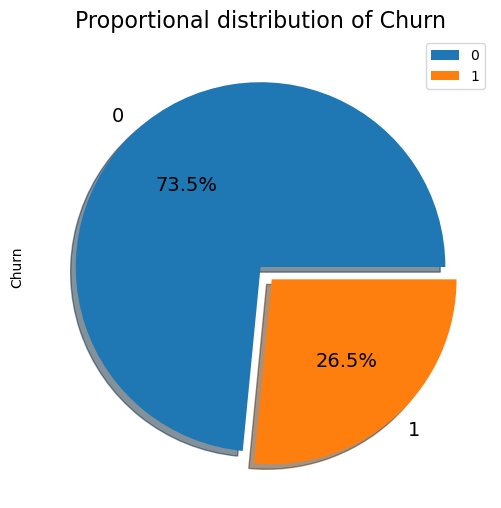

In [13]:
# Plotting the distribution of churn
# Plotting our dependent variable, y column
data_train['Churn'].value_counts().plot(kind='pie', legend=True, explode=[0, 0.09], autopct="%3.1f%%", shadow=True, figsize=(6,6), fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=10)

<AxesSubplot:xlabel='PhoneService', ylabel='TotalCharges'>

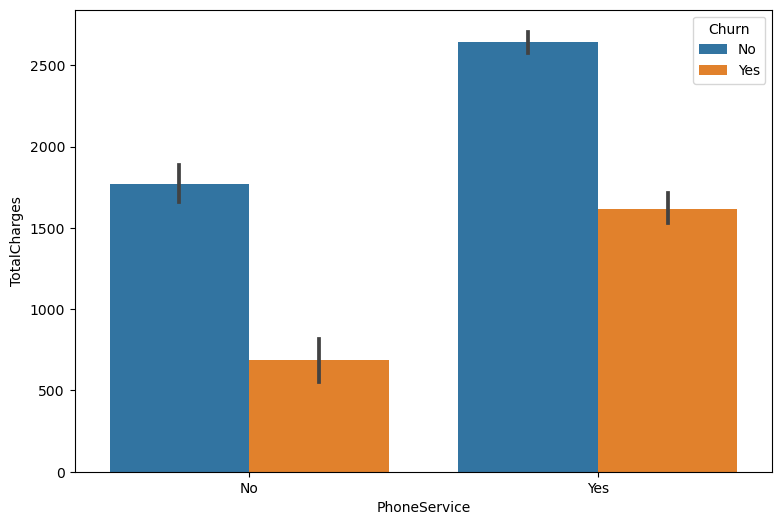

In [14]:
# Relation between PhoneService and TotalCharges with respect to Churn
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
plt.figure(figsize=(9, 6))
sns.barplot(data=data, x='PhoneService', y='TotalCharges', hue='Churn')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

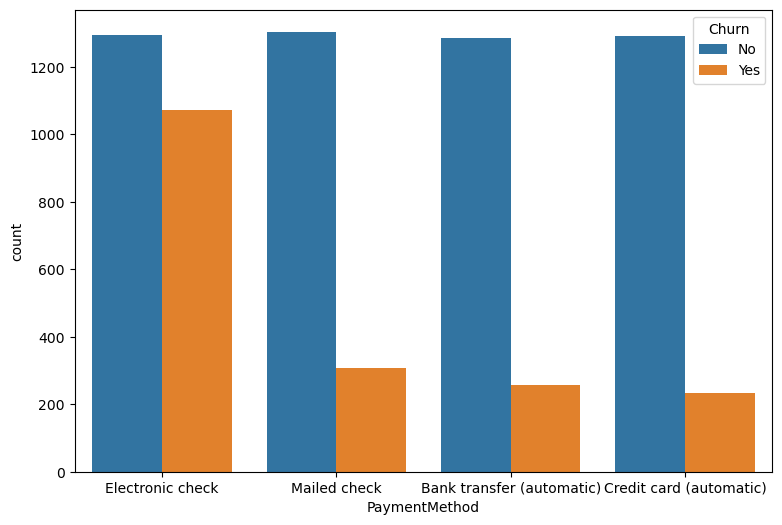

In [15]:
# Relation between PaymentMethod and Churn
plt.figure(figsize=(9,6))
sns.countplot(data=data,x='PaymentMethod', hue='Churn')

Text(0, 0.5, 'Churn')

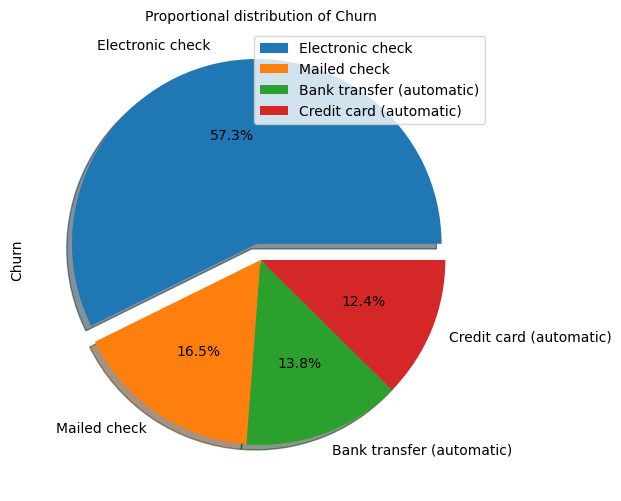

In [16]:
# Plotting the distribution of Paymenymethod where people churned
data[data['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%", shadow=True, figsize=(6,6),fontsize=10)
plt.title('Proportional distribution of Churn', fontsize=10)
plt.ylabel('Churn',fontsize=10)

<AxesSubplot:>

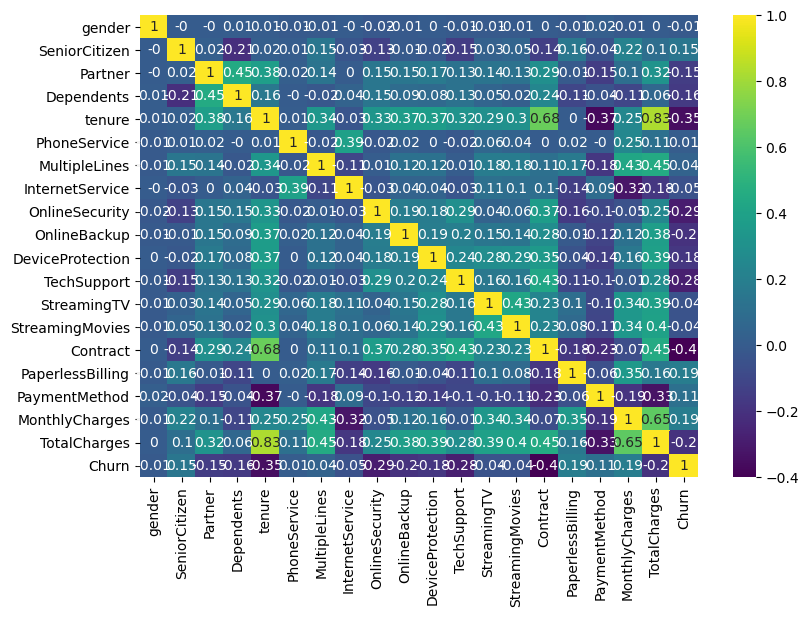

In [17]:
# Generating a heatmap plot of the correlation matrix for the label-encoded dataset
corr_mat=label_encoded_train.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(corr_mat,annot=True,cmap='viridis')

In [18]:
label_encoded_train['product_of_tenure_MonthCharges']=label_encoded_train['tenure']*label_encoded_train['MonthlyCharges']
label_encoded_train[['product_of_tenure_MonthCharges', 'TotalCharges']].corr()

,product_of_tenure_MonthCharges,TotalCharges
product_of_tenure_MonthCharges,1.00000,0.99956
TotalCharges,0.99956,1.00000


In [19]:
# Removing the 'product_of_tenure_MonthCharges' and 'TotalCharges' columns from the label-encoded dataset
label_encoded_train.drop(['product_of_tenure_MonthCharges','TotalCharges'],axis=1,inplace=True)

In [20]:
# Converting the cleaned data to csv
label_encoded_train.to_csv('Cleaned_Churn.csv')

In [21]:
# Loading the Cleaned Data
data=pd.read_csv("Cleaned_Churn.csv")

In [22]:
# Dropping the number column
data=data.drop("Unnamed: 0", axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [23]:
# Separating the feature variables into 'X' by excluding the 'Churn' column, and assigns the target variable 'y' as the 'Churn' column
X=data.drop('Churn',axis=1)
y=data['Churn']

Text(0, 0.5, 'Churn')

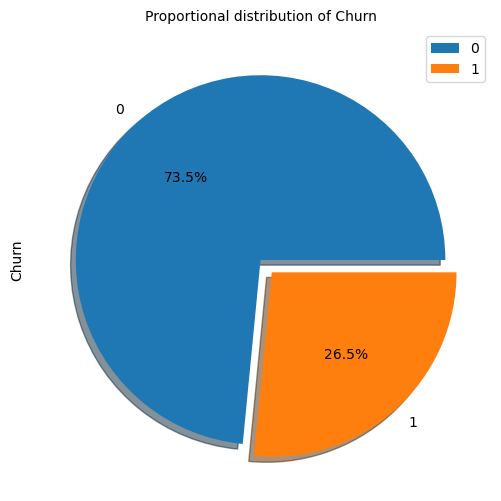

In [24]:
# Plotting the distribution of churn
# Plotting our dependent variable, y column
data['Churn'].value_counts().plot(kind='pie', legend=True, explode=[0, 0.09], autopct="%3.1f%%", shadow=True, figsize=(6,6), fontsize=10)
plt.title('Proportional distribution of Churn', fontsize=10)
plt.ylabel('Churn', fontsize=10)

In [25]:
# Returning the shape (number of rows and columns) of the 'X' DataFrame
X.shape

(7043, 18)

In [26]:
# Returning the shape (number of rows and columns) of the 'y' DataFrame
y.shape

(7043,)

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

# Apply SMOTE to oversample the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc69627eb80>
Traceback (most recent call last):
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [28]:
# Concatenate the dataframes column-wise
data_after_sampling = pd.concat([X_resampled, y_resampled], axis=1)

Text(0, 0.5, 'Churn')

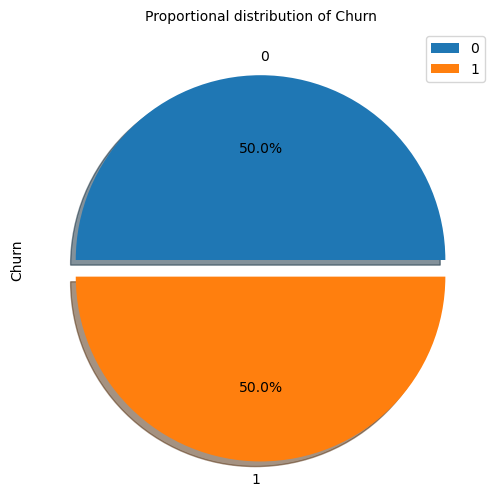

In [29]:
# Plotting the distribution of churn
# Plotting our dependent variable, y column
data_after_sampling['Churn'].value_counts().plot(kind='pie', legend=True, explode=[0, 0.09], autopct="%3.1f%%", shadow=True, figsize=(6,6), fontsize=10)
plt.title('Proportional distribution of Churn', fontsize=10)
plt.ylabel('Churn', fontsize=10)

In [30]:
# Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.1, random_state=1)

In [31]:
X_resampled.shape

(10348, 18)

In [32]:
y_resampled.shape

(10348,)

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of MultinomialNB classifier
nb_classifier = MultinomialNB()

# Fit the classifier to your training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       544
           1       0.70      0.78      0.74       491

    accuracy                           0.74      1035
   macro avg       0.74      0.74      0.74      1035
weighted avg       0.74      0.74      0.74      1035

Accuracy: 0.7352657004830918


In [41]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

# Create an instance of BernoulliNB classifier
bnb_classifier = BernoulliNB()

# Fit the classifier to your training data
bnb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bnb_classifier.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report (Bernoulli Naive Bayes):\n", classification_report)# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report (Bernoulli Naive Bayes):
               precision    recall  f1-score   support

           0       0.79      0.69      0.74       544
           1       0.70      0.80      0.75       491

    accuracy                           0.74      1035
   macro avg       0.75      0.74      0.74      1035
weighted avg       0.75      0.74      0.74      1035

Accuracy: 0.7420289855072464


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create an instance of LogisticRegression with max_iter set to 1000
logreg = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to your training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       544
           1       0.73      0.81      0.77       491

    accuracy                           0.77      1035
   macro avg       0.77      0.77      0.77      1035
weighted avg       0.78      0.77      0.77      1035

Accuracy: 0.7710144927536232


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create an instance of DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the decision tree classifier to your training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       544
           1       0.75      0.81      0.78       491

    accuracy                           0.79      1035
   macro avg       0.79      0.79      0.79      1035
weighted avg       0.79      0.79      0.79      1035

Accuracy: 0.7864734299516908


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the random forest classifier to your training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       544
           1       0.79      0.86      0.83       491

    accuracy                           0.83      1035
   macro avg       0.83      0.83      0.83      1035
weighted avg       0.83      0.83      0.83      1035

Accuracy: 0.8280193236714976


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an instance of SVC classifier
svm_classifier = SVC()

# Fit the SVM classifier to your training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report (SVM):\n", classification_report)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.80      0.72      0.75       544
           1       0.72      0.80      0.76       491

    accuracy                           0.75      1035
   macro avg       0.76      0.76      0.75      1035
weighted avg       0.76      0.75      0.75      1035

Accuracy: 0.7545893719806763


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create an instance of GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Fit the Gradient Boosting classifier to your training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report (Gradient Boosting):\n", classification_report)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       544
           1       0.76      0.88      0.82       491

    accuracy                           0.81      1035
   macro avg       0.82      0.82      0.81      1035
weighted avg       0.82      0.81      0.81      1035

Accuracy: 0.8135265700483092


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create an instance of KNeighborsClassifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to your training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report (KNN):\n", classification_report)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc6f1b27f70>
Traceback (most recent call last):
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/narendra-iitj/anaconda3/envs/self_env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       544
           1       0.72      0.92      0.80       491

    accuracy                           0.79      1035
   macro avg       0.81      0.79      0.79      1035
weighted avg       0.81      0.79      0.79      1035

Accuracy: 0.7884057971014493
